In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('../data/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/kaggle/input/.DS_Store
../data/kaggle/input/titanic/my_submission.csv
../data/kaggle/input/titanic/test.csv
../data/kaggle/input/titanic/train.csv


In [2]:
def squash_dummies(df: pd.DataFrame, feature, threshold):
    masked_df = df[feature].mask(df[feature] > threshold)
    df = df.drop(columns=[feature])
    df[feature] = masked_df
    return df

def prepare_df(df: pd.DataFrame):
    new_df = df
    extract_title_from_name(new_df)
    _dummy_features0 = ["Embarked"]
    _dummy_features = ["Pclass", "Sex", "SibSp", "Parch", "Title"]
    new_df = squash_dummies(new_df, 'Parch', 2)
    new_df = squash_dummies(new_df, 'SibSp', 4)
    new_df = new_df.drop(columns=['Name'])
    new_df = pd.get_dummies(new_df, columns=_dummy_features0, dummy_na=True)
    return pd.get_dummies(new_df, columns=_dummy_features, dummy_na=False)

def extract_title_from_name(df: pd.DataFrame):
    df['Title'] = list(zip(df.Sex, df.Name, df.SibSp))
    df['Title'] = df['Title'].transform(lambda n: extract_title(n))
    print(df['Title'].unique())

def extract_title(name):
    male = name[0] == 'male'
    if male and str(name[1]).find('Mr') > -1:
        return 'Mr'
    if not male and str(name[1]).find('Mrs') > -1:
        return 'Mrs'
    if not male and str(name[1]).find('Miss') > -1:
        return 'Miss'
    if not male and str(name[1]).find('Mme') > -1:
        return 'Ms'
    if male and str(name[1]).find('Master') > -1:
        return 'Master'
    if str(name[1]).find('Dr.') > -1:
        return 'Dr'
    if male:
        return 'Mr'
    if name[2]>1:
        return'Mrs'
    # print(name)
    return 'Ms'

In [3]:
train_data = pd.read_csv('../data/kaggle/input/titanic/train.csv')
print(train_data.head())

print(train_data.describe())
# train_data.groupby('Embarked').hist()
# train_data.groupby('Cabin').sum().head(50)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
test_data = pd.read_csv('../data/kaggle/input/titanic/test.csv')
print(test_data.columns)
print(test_data.head())
print(test_data.describe())

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
       PassengerId      Pclass      

In [5]:
def plot_rate(df: pd.DataFrame, feature):
    m_df = df
    m_df['cnt'] = 1
    m_gb = m_df.groupby(feature).sum()
    m_gb['rate'] = m_gb['Survived']/m_gb['cnt']
    # m_gb[['rate']].plot()
    # plt.scatter(m_gb)
    # plt.show()
    print(m_gb[['rate']].head())

In [6]:
all_data = pd.concat([train_data, test_data], axis=0)
extract_title_from_name(all_data)
print(f"Columns: {all_data.columns}")

eda_features = ["Pclass", "Title", "Sex", "SibSp", "Parch", "Embarked"]
for k in eda_features:
    plot_rate(all_data, k)
    # print(f"Unique {k}: {train_data[k].unique()}")
# plot_rate(all_data, eda_features[0])


['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')
            rate
Pclass          
1       0.421053
2       0.314079
3       0.167842
            rate
Title           
Dr      0.375000
Master  0.377049
Miss    0.488372
Mr      0.108387
Mrs     0.507463
          rate
Sex           
female  0.5000
male    0.1293
           rate
SibSp          
0      0.235690
1      0.351097
2      0.309524
3      0.200000
4      0.136364
           rate
Parch          
0      0.232535
1      0.382353
2      0.353982
3      0.375000
4      0.000000
              rate
Embarked          
C         0.344444
Q         0.243902
S         0.237418


In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def eval_msu(x_train, x_eval, y_train, y_eval, _model):
    _model.fit(x_train, train_y)
    eval_predictions = _model.predict(x_eval)
    msu = mean_squared_error(y_eval, eval_predictions)
    train_predictions = _model.predict(x_train)
    train_msu = mean_squared_error(y_train, train_predictions)
    return msu, train_msu

def print_msu(x_train, x_eval, y_train, y_eval, _model):
    msu, train_msu = eval_msu(x_train, x_eval, y_train, y_eval, _model)
    print(f"e_msu={msu:.7f}; t_msu={train_msu:.7f}; model={_model}")

def print_cvs(_model, x_eval, y_eval):
    print(f"µ_cvs={cross_val_score(_model, x_eval, y_eval, cv=5).mean():.7f}; model={_model}")

In [33]:
from sklearn.ensemble import RandomForestClassifier

def forest_accuracy_estimators(_x, _y, x_train, x_eval, y_train, y_eval, max_depth, max_est=600, est_step=5):
    min_msu = float('inf')
    min_train_msu = 0
    optimal_n=0
    estimators = range(50, max_est, est_step)
    _msus = []
    _cvs = []
    for _e in estimators:
        _model = RandomForestClassifier(n_estimators=_e, max_depth=max_depth, random_state=1)
        msu, train_msu = eval_msu(x_train, x_eval, y_train, y_eval, _model)
        _cvs.append(cross_val_score(_model, _x, _y, cv=5).mean())
        _msus.append(msu)
        if msu < min_msu:
            min_msu = msu
            optimal_n = _e
            min_train_msu = train_msu
    df = {"estimators": estimators, "msus": _msus}
    plt.plot(df['estimators'], df['msus'], label=f"d_{max_depth}")
    print(f"min_msu={min_msu:.5f} for depth={max_depth}, n_est={optimal_n}")
    print(f"train_m={min_train_msu:.5f}; CVS={np.max(_cvs):.5f}")

In [34]:
from sklearn.model_selection import train_test_split

features = ["Pclass", "Sex", "SibSp", "Parch", "Name", "Embarked"]
y = train_data["Survived"]
X = prepare_df(train_data[features])
X.describe()
train_x, eval_x, train_y, eval_y = train_test_split(X.fillna(X.mean()), y, random_state=24)

['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']


<ipython-input-2-792ce73acae8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = list(zip(df.Sex, df.Name, df.SibSp))
<ipython-input-2-792ce73acae8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].transform(lambda n: extract_title(n))


In [35]:
model = RandomForestClassifier(n_estimators=40, max_depth=6, random_state=10)
print_cvs(model, X.fillna(X.mean()), y)

def plot_random_forest_by_depth_and_est():
    for d in range(4, 15):
        forest_accuracy_estimators(X.fillna(X.mean()), y, train_x, eval_x, train_y, eval_y, d, max_est=400, est_step=10)
    plt.legend()
    plt.show()
# plot_random_forest_by_depth_and_est()

µ_cvs=0.8125855251; model=RandomForestClassifier(max_depth=6, n_estimators=40, random_state=10)


In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, max_iter=100000)
model.fit(train_x, train_y)
print_msu(train_x, eval_x, train_y, eval_y, model)
print_cvs(model, X.fillna(X.mean()), y)

e_msu=0.1704036; t_msu=0.1661677; model=LogisticRegression(max_iter=100000, random_state=0)
µ_cvs=0.8148202; model=LogisticRegression(max_iter=100000, random_state=0)


e_msu=0.1793722; t_msu=0.1781437; model=SGDClassifier(alpha=0.003, max_iter=10000, random_state=0)
µ_cvs=0.8192832; model=SGDClassifier(alpha=0.003, max_iter=100000, random_state=0)


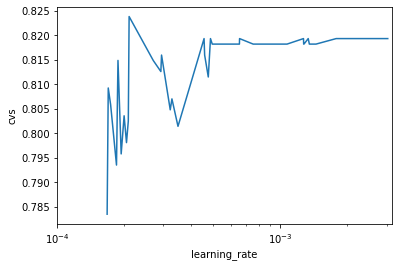

In [70]:
from sklearn.linear_model import SGDClassifier

print_msu(train_x, eval_x, train_y, eval_y, SGDClassifier(random_state=0, max_iter=10000, alpha=0.003))
print_cvs(SGDClassifier(random_state=0, max_iter=100000, alpha=0.003), X.fillna(X.mean()), y)

def plot_sgd_by_lr():
    graph = {}
    for i in range(50):
        exp = -1.3 * np.random.rand() - 2.5
        alpha = 10 ** exp
        cvs = cross_val_score(SGDClassifier(random_state=0, max_iter=100000, alpha=alpha), X.fillna(X.mean()), y,
                              cv=5).mean()
        graph[alpha] = cvs
    lists = sorted(graph.items(), reverse=True)  # sorted by key, return a list of tuples
    _x, _y = zip(*lists)
    plt.plot(_x, _y)
    plt.xscale('log')
    plt.xlabel('learning_rate')
    plt.ylabel('cvs')
    plt.xlim(10 ** -4, 10 ** -2.5)
    plt.show()
plot_sgd_by_lr()

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

print_cvs(GaussianNB(), X.fillna(X.mean()), y)
print_cvs(MultinomialNB(), X.fillna(X.mean()), y)
print_cvs(ComplementNB(), X.fillna(X.mean()), y)

µ_cvs=0.6576925; model=GaussianNB()
µ_cvs=0.8013182; model=MultinomialNB()
µ_cvs=0.7990835; model=ComplementNB()


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

print_cvs(KNeighborsClassifier(), X.fillna(X.mean()), y)
print_cvs(KNeighborsRegressor(), X.fillna(X.mean()), y)

µ_cvs=0.8024794; model=KNeighborsClassifier()
µ_cvs=0.3692283; model=KNeighborsRegressor()


In [201]:
from sklearn.ensemble import RandomForestClassifier

test_data = pd.read_csv('../data/kaggle/input/titanic/test.csv')
X_test = prepare_df(test_data[features])
X_test = X_test.fillna(X.mean())

model = RandomForestClassifier(n_estimators=30, max_depth=7, random_state=1) #245/8
model.fit(train_x, train_y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('../data/kaggle/output/my_submission.csv', index=False)
print("Your submission was successfully saved!")

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Dr']
Your submission was successfully saved!


<ipython-input-177-0756dd6cb8a1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = list(zip(df.Sex, df.Name, df.SibSp))
<ipython-input-177-0756dd6cb8a1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].transform(lambda n: extract_title(n))


['Mr' 'Mrs' 'Miss' 'Master' 'Dr' 'Ms']


<AxesSubplot:>

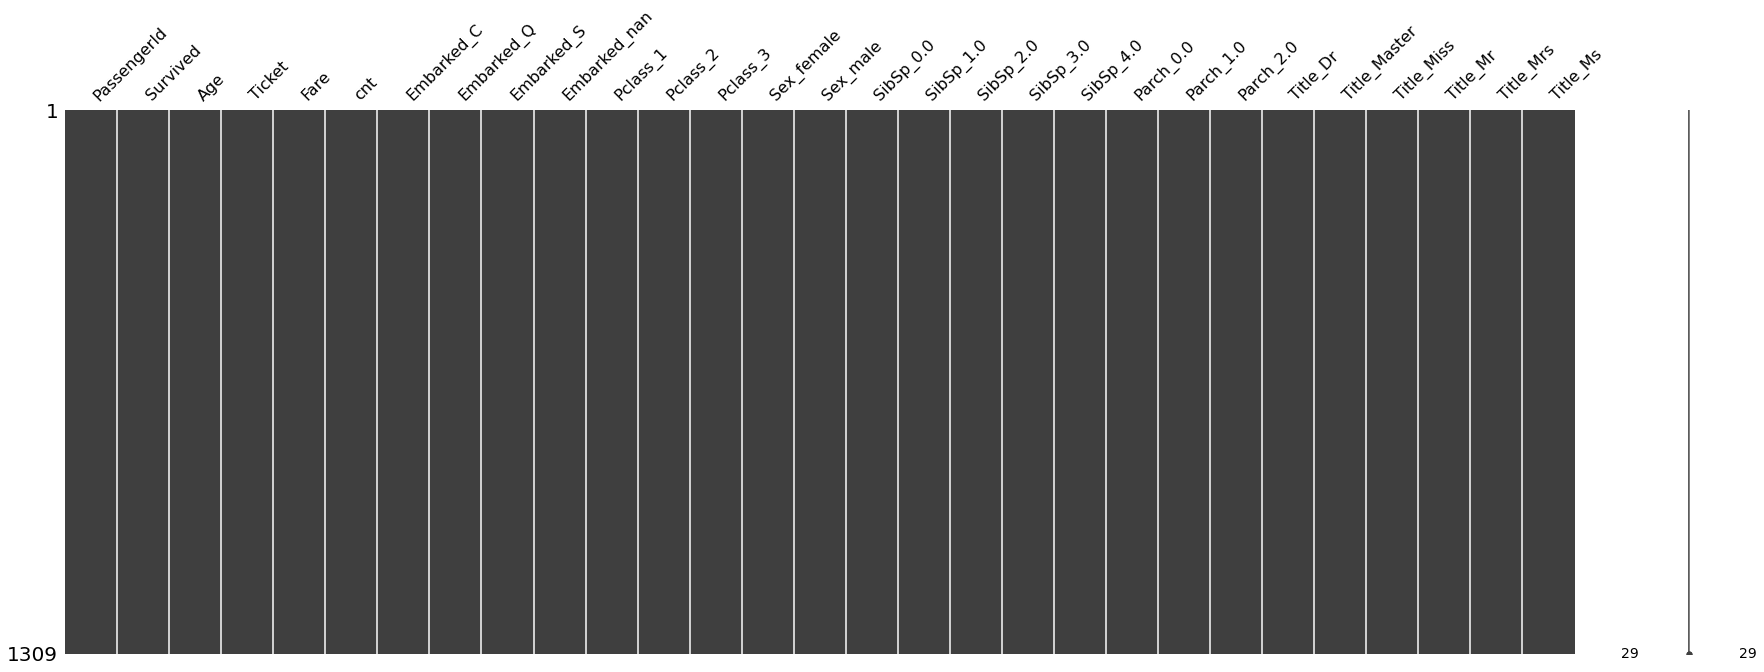

In [215]:
import pandas as pd
import missingno as msno

train_data = pd.read_csv('../data/kaggle/input/titanic/train.csv')
%matplotlib inline
msno.matrix(prepare_df(all_data).fillna(all_data.mean()).drop(columns=['Cabin']), figsize = (30,10))